In [24]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
X = dataset.loc[ : , dataset.columns != 'y']
y = dataset["y"]

In [19]:
#Decision tree Hyperparameter Tuning and Visualization

sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=999)

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X, y);

Fitting 30 folds for each of 80 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   11.2s finished


In [20]:
gs_DT.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3}

In [21]:
gs_DT.best_score_

0.6616666666666667

In [22]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

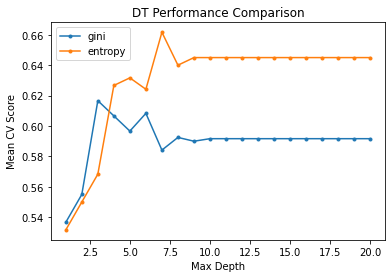

In [25]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [26]:
#NB Hyperparameter Tuning and Visualization
import numpy as np
from sklearn.preprocessing import PowerTransformer

np.random.seed(999)

sample_size = 1000
x_exponential = np.random.exponential(2, sample_size).reshape(-1, 1)
x_transformed = PowerTransformer().fit_transform(x_exponential)

df1 = pd.DataFrame(x_exponential)
df1['distribution'] = 'exponential'

df2 = pd.DataFrame(x_transformed)
df2['distribution'] = 'transformed'

# combine the two data frames into one to be used for plotting
df = pd.concat([df1, df2], axis=0)
df.rename(columns={0: 'x'}, inplace=True)

print(df.sample(n=10))

            x distribution
342 -0.276524  transformed
321  3.216755  exponential
247  1.297923  transformed
514 -1.678249  transformed
343  0.204341  exponential
386  0.486638  exponential
304  0.883091  exponential
772  0.015391  exponential
889  0.184597  transformed
554  0.076667  exponential


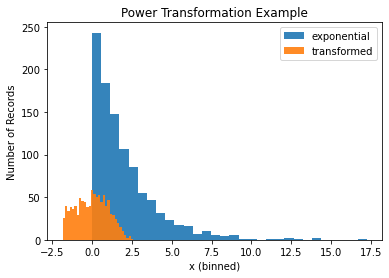

In [27]:
for i in ['exponential', 'transformed']:
    temp = df[df['distribution']==i]
    plt.hist(temp['x'], alpha = 0.9, bins =30, label = i)

plt.xlabel('x (binned)')
plt.ylabel('Number of Records')
plt.title('Power Transformation Example')
plt.legend()
plt.show()

In [28]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [29]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X)

gs_NB.fit(Data_transformed, y);

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    3.3s finished


In [30]:
gs_NB.best_params_

{'var_smoothing': 0.43287612810830584}

In [31]:
gs_NB.best_score_

0.7883333333333333

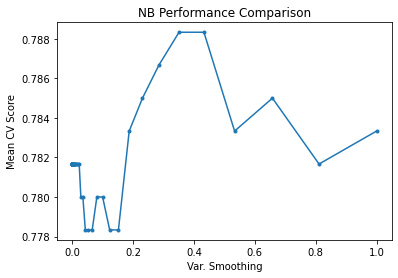

In [32]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()